<a href="https://colab.research.google.com/github/Yoshibansal/Face_Eyes_Detection/blob/master/Extracting_eyes_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
#Create a cascade Classifier objects
face_cascade = cv2.CascadeClassifier('/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('/haarcascade_eye.xml')

In [0]:
#To read the image 
#Set the path of the image 
img = cv2.imread('/josh-hartnett.jpg')

#Reading the image as gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [0]:
#search the co-ordinates of the image
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

In [0]:
#for adding the rectangle boxes around the faces and eyes
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
       cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

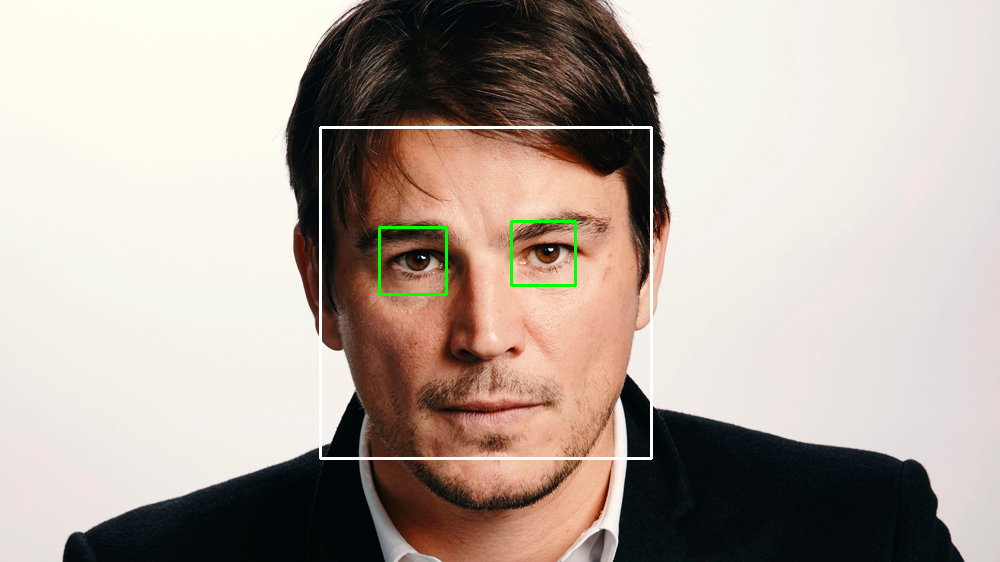

In [37]:

#printing the image with detected faces and eyes
cv2_imshow(img)


Person  1


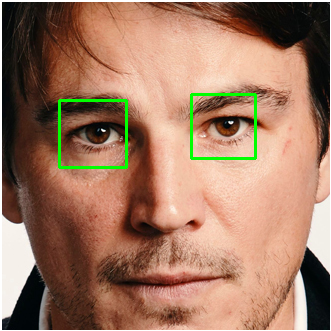

True



In [38]:
#for extracting faces from an image
count = 1
import pathlib
for x,y,w,h in faces:
  pathlib.Path("/home/person{}".format(count)).mkdir(parents=True, exist_ok=True)
  print("Person ",count)
  extracted_face = img[y:y+h, x:x+w]
  cv2_imshow(extracted_face)
  path = "/home/person{}/per{}.jpeg".format(count,count)
  print(cv2.imwrite(path,extracted_face))
  print("")
  count += 1

Person 1 eyes
Left eye 


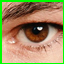

True
Right eye 


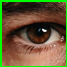

True



In [39]:

#for extracting eyes from an image
count_e = 1
for (x,y,w,h) in faces:
  print("Person {} eyes".format(count_e))
  roi_color = img[y:y+h, x:x+w]
  eye_no = "Left"
  for (ex,ey,ew,eh) in eyes:
      print("{} eye ".format(eye_no))
      extracted_eye = roi_color[ey:ey+eh, ex:ex+ew]
      #cv2_imshow(cv2.resize(extracted_eye,(int(extracted_eye.shape[1]*2),int(extracted_eye.shape[0]*2))))
      cv2_imshow(extracted_eye)
      path = "/home/person{}/{}.jpeg".format(count_e,eye_no)
      print(cv2.imwrite(path,extracted_eye))
      eye_no = "Right" 
  print("")
  count_e += 1
